In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Read  first master file 
df = pd.read_csv ('solar_wind.csv')
df_sw = df.drop(columns=['theta_gse','phi_gse','theta_gsm','phi_gsm','bx_gse','by_gse','bz_gse','bx_gsm','by_gsm','bz_gsm'])
df_desc = df_sw.describe()
print(df_desc)

FileNotFoundError: [Errno 2] No such file or directory: 'solar_wind.csv'

In [4]:
# Read second master file
df_dst = pd.read_csv ('labels.csv')
df_desc = df_dst.describe()
print(df_desc)

                 dst
count  139872.000000
mean      -11.055236
std        19.069327
min      -387.000000
25%       -18.000000
50%        -8.000000
75%         0.000000
max        67.000000


In [5]:


plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# read third master file
df_ss = pd.read_csv ('sunspots.csv')
df_desc = df_ss.describe()
print(df_desc)

       smoothed_ssn
count    192.000000
mean      58.095833
std       52.517753
min        2.200000
25%       14.150000
50%       39.000000
75%       95.125000
max      175.200000


In [4]:
# Look at overal statistics
z = df_sw.groupby("period").describe()

z.to_csv('C:/Users/kari.abromitis/Desktop/Data Science/z.csv')

In [7]:
df_ss.groupby("period").describe()

smoothed_ssn                                                        \
               count       mean        std   min      25%     50%      75%   
period                                                                       
train_a         40.0  136.90250  34.563168  65.4  108.375  151.50  164.400   
train_b         72.0   51.85000  39.200266   3.9   15.325   43.15   91.225   
train_c         80.0   24.31375  19.020414   2.2    7.775   20.50   38.525   

                
           max  
period          
train_a  175.2  
train_b  116.4  
train_c   69.5

In [8]:
# Look at overall statistics
df_dst.groupby("period").describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

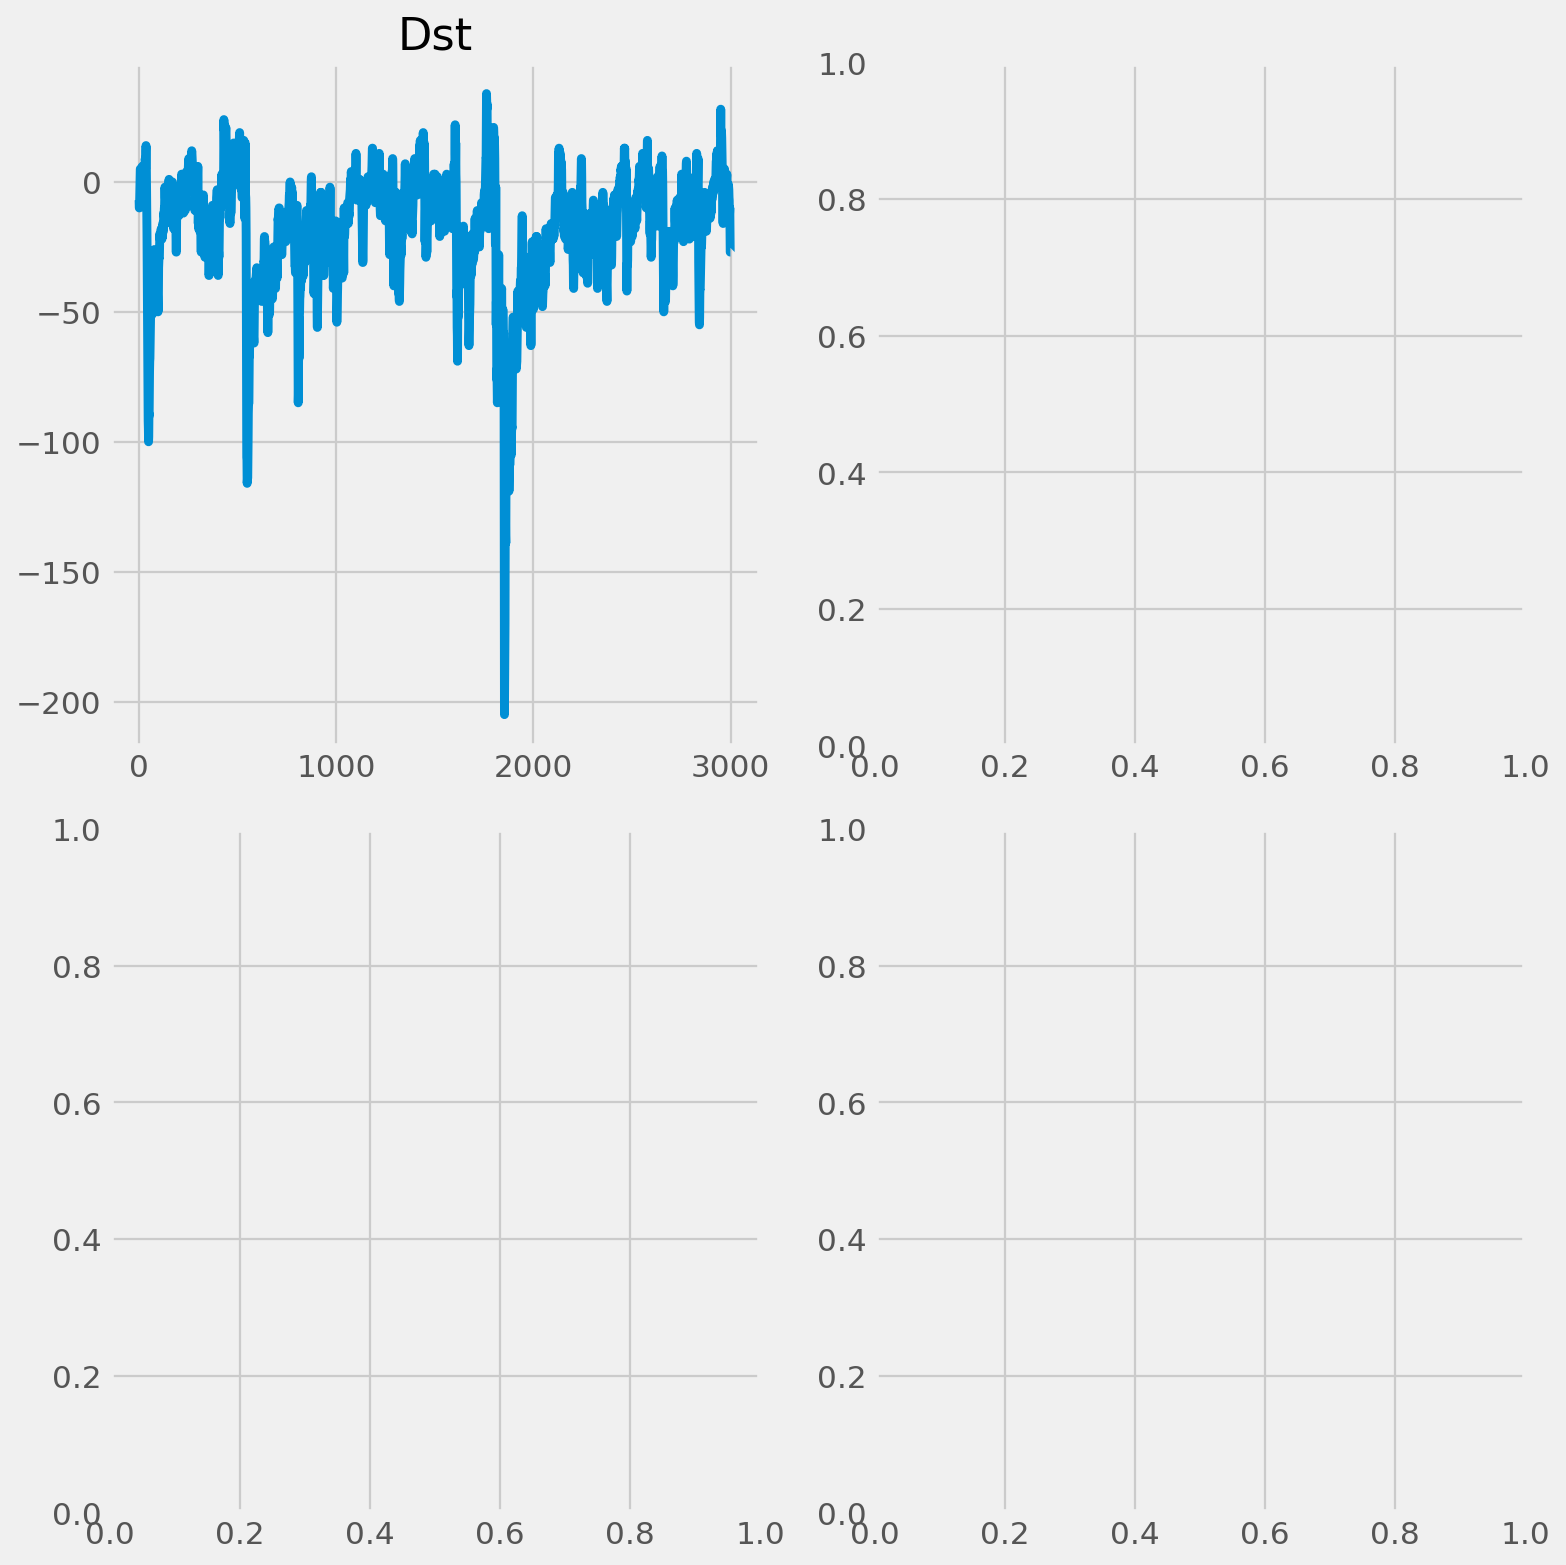

In [9]:
# Visually examine data

plt.style.use('fivethirtyeight')
def visual(data):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
        )

    fig.subplots_adjust(hspace=1)
    plt.tight_layout()
    
sw_plot = ["dst"]
visual(df_dst[sw_plot].iloc[:3000])

In [10]:
# Split and convert time series to help merge datasets

df_10 = df_sw

df_10[['Day','Label','Time']] = df_10['timedelta'].str.split(" ", expand=True)
# df_t = df_10.drop(columns=['theta_gse','phi_gse','theta_gsm','phi_gsm','bx_gse','by_gse','bz_gse','bx_gsm','by_gsm','bz_gsm','period','Label','timedelta'])
df_10[['Hour','Minute','Second']] = df_10['Time'].str.split(":", expand=True)
df_t = df_10
df_t['Day'] = pd.to_numeric(df_t['Day'])
df_t['Hour'] = pd.to_numeric(df_t['Hour'])
df_t['Minute'] = pd.to_numeric(df_t['Minute'])
df_t['Second'] = pd.to_numeric(df_t['Second'])
df_t = df_t.dropna()
print(df_t)

          period           timedelta    bt  density   speed  temperature  \
0        train_a     0 days 00:00:00  6.80     1.53  383.92     110237.0   
1        train_a     0 days 00:01:00  6.83     1.69  381.79     123825.0   
2        train_a     0 days 00:02:00  6.77     1.97  389.11      82548.0   
3        train_a     0 days 00:03:00  6.74     1.97  389.11      82548.0   
4        train_a     0 days 00:04:00  6.65     1.77  384.26      94269.0   
...          ...                 ...   ...      ...     ...          ...   
8392315  train_c  2435 days 23:55:00  4.56     4.64  348.73      23368.0   
8392316  train_c  2435 days 23:56:00  4.58     4.27  346.36      26497.0   
8392317  train_c  2435 days 23:57:00  4.61     3.95  344.12      27050.0   
8392318  train_c  2435 days 23:58:00  4.65     2.81  338.52      33257.0   
8392319  train_c  2435 days 23:59:00  4.62     2.30  342.31      32267.0   

        source   Day Label      Time  Hour  Minute  Second  
0           ac     0  days

In [11]:


df_t['Day'].astype(int)
df_t['Hour'].astype(int)
df_t['Minute'].astype(int)
df_t['Second'].astype(int)

df4 = df_t.groupby(['period','Day','Hour']).mean()
print(df4)

df5 = df_t.groupby(['period','Day','Hour']).std()
print(df5)

                         bt   density       speed   temperature     Minute  \
period  Day  Hour                                                            
train_a 0    0     6.926154  1.222692  356.591538  71071.403846  27.596154   
             1     7.285349  1.055814  337.480930  59333.209302  30.930233   
             2     7.878421  1.141053  335.142105  48582.368421  28.026316   
             3     7.742456  2.754211  347.815088  76768.736842  29.701754   
             4     6.278500  2.889500  370.297500  78039.550000  48.700000   
...                     ...       ...         ...           ...        ...   
train_c 2435 19    4.471250  2.815179  337.512321  48704.339286  29.178571   
             20    4.518571  2.333929  334.182679  61596.750000  28.750000   
             21    4.566034  2.309828  348.398621  34921.879310  29.034483   
             22    4.715088  2.133333  343.394035  41678.245614  29.982456   
             23    4.555000  2.293276  343.861897  36160.844828 

In [12]:

df4.rename(columns={'bt': 'bt_mean', 'density': 'density_mean', 'speed': 'speed_mean', 'temperature': 'temp_mean'}, inplace=True)

print(df4.columns)

df5.rename(columns={'bt': 'bt_std', 'density': 'density_std', 'speed': 'speed_std', 'temperature': 'temp_std'}, inplace=True)

print(df5.columns)


Index(['bt_mean', 'density_mean', 'speed_mean', 'temp_mean', 'Minute',
       'Second'],
      dtype='object')
Index(['bt_std', 'density_std', 'speed_std', 'temp_std', 'Minute', 'Second'], dtype='object')


In [13]:
# merge datasets based on period and timestamp

merged_data= df4.merge(df5, on=["period","Day","Hour"])


In [14]:
merged_data.to_csv('C:/Users/kari.abromitis/Desktop/Data Science/file_name.csv')

In [15]:
final_sw = merged_data

# final sw data achieved

In [16]:
# moving to Dst lbaels file

print(df_dst)

         period           timedelta  dst
0       train_a     0 days 00:00:00   -7
1       train_a     0 days 01:00:00  -10
2       train_a     0 days 02:00:00  -10
3       train_a     0 days 03:00:00   -6
4       train_a     0 days 04:00:00   -2
...         ...                 ...  ...
139867  train_c  2435 days 19:00:00  -16
139868  train_c  2435 days 20:00:00  -14
139869  train_c  2435 days 21:00:00  -14
139870  train_c  2435 days 22:00:00  -15
139871  train_c  2435 days 23:00:00  -14

[139872 rows x 3 columns]


In [17]:
df_dst[['Day','Label','Time']] = df_dst['timedelta'].str.split(" ", expand=True)

df_dst[['Hour','Minute','Second']] = df_dst['Time'].str.split(":", expand=True)

df_dst['Day'] = pd.to_numeric(df_dst['Day'])
df_dst['Hour'] = pd.to_numeric(df_dst['Hour'])
df_dst['Minute'] = pd.to_numeric(df_dst['Minute'])
df_dst['Second'] = pd.to_numeric(df_dst['Second'])
df_dst = df_dst.dropna()
print(df_dst)

         period           timedelta  dst   Day Label      Time  Hour  Minute  \
0       train_a     0 days 00:00:00   -7     0  days  00:00:00     0       0   
1       train_a     0 days 01:00:00  -10     0  days  01:00:00     1       0   
2       train_a     0 days 02:00:00  -10     0  days  02:00:00     2       0   
3       train_a     0 days 03:00:00   -6     0  days  03:00:00     3       0   
4       train_a     0 days 04:00:00   -2     0  days  04:00:00     4       0   
...         ...                 ...  ...   ...   ...       ...   ...     ...   
139867  train_c  2435 days 19:00:00  -16  2435  days  19:00:00    19       0   
139868  train_c  2435 days 20:00:00  -14  2435  days  20:00:00    20       0   
139869  train_c  2435 days 21:00:00  -14  2435  days  21:00:00    21       0   
139870  train_c  2435 days 22:00:00  -15  2435  days  22:00:00    22       0   
139871  train_c  2435 days 23:00:00  -14  2435  days  23:00:00    23       0   

        Second  
0            0  
1    

In [18]:
df_dst = df_dst.drop(columns=['Minute','Second','Time','Label','timedelta'])


In [19]:
final_sw_dst = final_sw.merge(df_dst, on=["period","Day","Hour"])
print(final_sw_dst.columns)

Index(['period', 'Day', 'Hour', 'bt_mean', 'density_mean', 'speed_mean',
       'temp_mean', 'Minute_x', 'Second_x', 'bt_std', 'density_std',
       'speed_std', 'temp_std', 'Minute_y', 'Second_y', 'dst'],
      dtype='object')


In [20]:
# finally, moving on to sunspots

print(df_ss)

      period           timedelta  smoothed_ssn
0    train_a     0 days 00:00:00          65.4
1    train_a    13 days 00:00:00          72.0
2    train_a    44 days 00:00:00          76.9
3    train_a    74 days 00:00:00          80.8
4    train_a   105 days 00:00:00          85.4
..       ...                 ...           ...
187  train_c  2283 days 00:00:00          26.4
188  train_c  2314 days 00:00:00          29.5
189  train_c  2344 days 00:00:00          34.5
190  train_c  2375 days 00:00:00          39.1
191  train_c  2405 days 00:00:00          42.5

[192 rows x 3 columns]


In [21]:
date_dum = final_sw_dst.drop(columns=['bt_mean', 'density_mean', 'speed_mean','temp_mean', 'bt_std', 'density_std', 'speed_std', 'temp_std', 'dst'])
print(date_dum)

         period   Day  Hour   Minute_x  Second_x   Minute_y  Second_y
0       train_a     0     0  27.596154       0.0  17.676016       0.0
1       train_a     0     1  30.930233       0.0  17.452514       0.0
2       train_a     0     2  28.026316       0.0  19.467904       0.0
3       train_a     0     3  29.701754       0.0  17.486694       0.0
4       train_a     0     4  48.700000       0.0   6.207805       0.0
...         ...   ...   ...        ...       ...        ...       ...
136504  train_c  2435    19  29.178571       0.0  17.486730       0.0
136505  train_c  2435    20  28.750000       0.0  17.285043       0.0
136506  train_c  2435    21  29.034483       0.0  17.411395       0.0
136507  train_c  2435    22  29.982456       0.0  17.515800       0.0
136508  train_c  2435    23  29.637931       0.0  17.480514       0.0

[136509 rows x 7 columns]


In [22]:
df_ss[['Day','Label','Time']] = df_ss['timedelta'].str.split(" ", expand=True)

df_ss[['Hour','Minute','Second']] = df_ss['Time'].str.split(":", expand=True)

df_ss['Day'] = pd.to_numeric(df_ss['Day'])
df_ss['Hour'] = pd.to_numeric(df_ss['Hour'])
df_ss['Minute'] = pd.to_numeric(df_ss['Minute'])
df_ss['Second'] = pd.to_numeric(df_ss['Second'])
df_ss = df_ss.dropna()

df_ss = df_ss.drop(columns=['Minute','Second','Time','Label','timedelta'])

print(df_ss)

      period  smoothed_ssn   Day  Hour
0    train_a          65.4     0     0
1    train_a          72.0    13     0
2    train_a          76.9    44     0
3    train_a          80.8    74     0
4    train_a          85.4   105     0
..       ...           ...   ...   ...
187  train_c          26.4  2283     0
188  train_c          29.5  2314     0
189  train_c          34.5  2344     0
190  train_c          39.1  2375     0
191  train_c          42.5  2405     0

[192 rows x 4 columns]


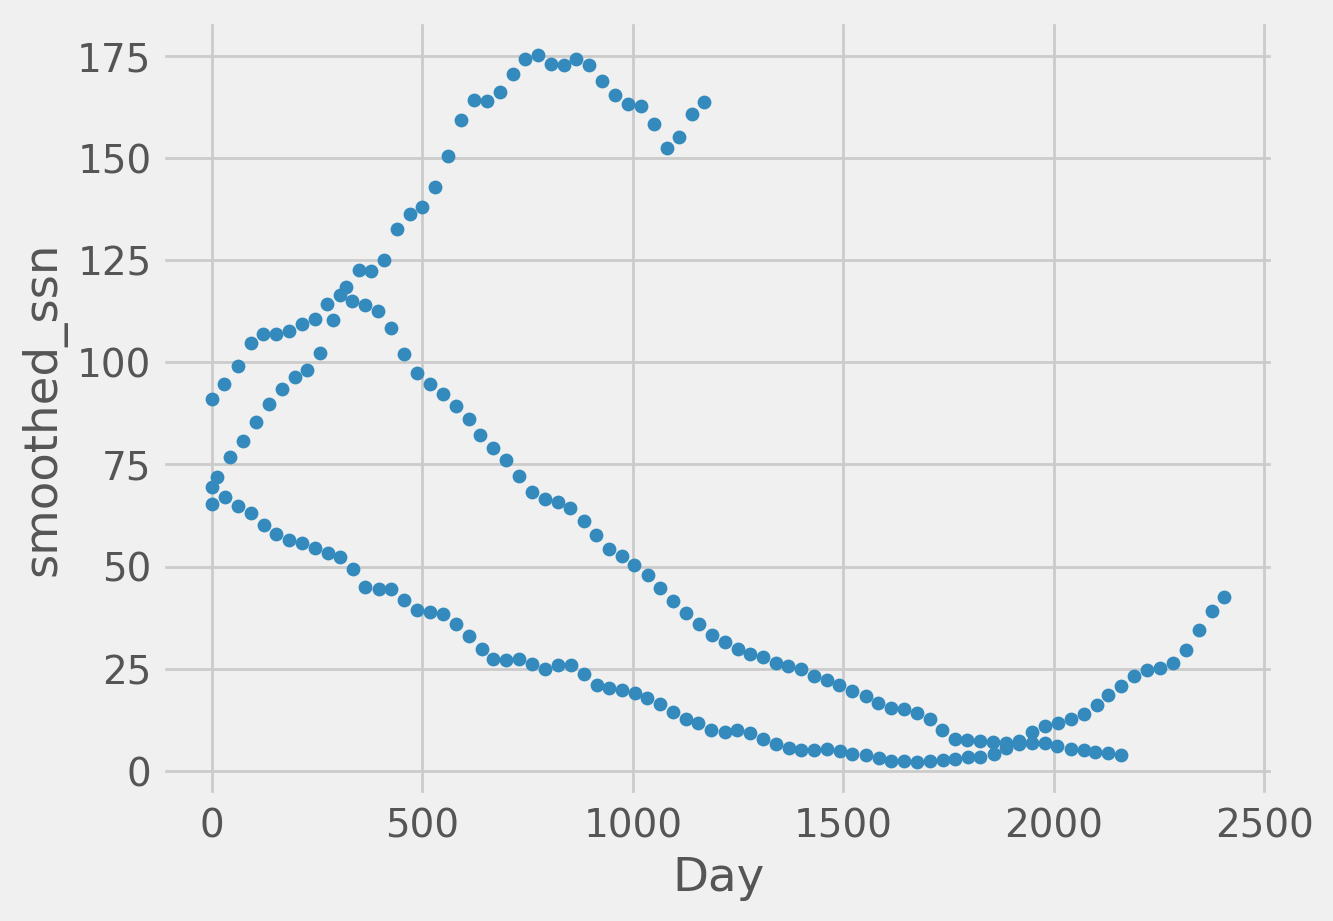

In [23]:
import matplotlib.pyplot as plt
df_ss.plot(x='Day',y='smoothed_ssn',kind='scatter')
plt.show()

In [24]:
final_ss = pd.merge(date_dum, df_ss, on=["period","Day","Hour"], how='left').fillna(method='ffill')
print(final_ss)

         period   Day  Hour   Minute_x  Second_x   Minute_y  Second_y  \
0       train_a     0     0  27.596154       0.0  17.676016       0.0   
1       train_a     0     1  30.930233       0.0  17.452514       0.0   
2       train_a     0     2  28.026316       0.0  19.467904       0.0   
3       train_a     0     3  29.701754       0.0  17.486694       0.0   
4       train_a     0     4  48.700000       0.0   6.207805       0.0   
...         ...   ...   ...        ...       ...        ...       ...   
136504  train_c  2435    19  29.178571       0.0  17.486730       0.0   
136505  train_c  2435    20  28.750000       0.0  17.285043       0.0   
136506  train_c  2435    21  29.034483       0.0  17.411395       0.0   
136507  train_c  2435    22  29.982456       0.0  17.515800       0.0   
136508  train_c  2435    23  29.637931       0.0  17.480514       0.0   

        smoothed_ssn  
0               65.4  
1               65.4  
2               65.4  
3               65.4  
4       

In [25]:
final_all = final_sw_dst.merge(final_ss, on=["period","Day","Hour"])
print(final_all)

         period   Day  Hour   bt_mean  density_mean  speed_mean     temp_mean  \
0       train_a     0     0  6.926154      1.222692  356.591538  71071.403846   
1       train_a     0     1  7.285349      1.055814  337.480930  59333.209302   
2       train_a     0     2  7.878421      1.141053  335.142105  48582.368421   
3       train_a     0     3  7.742456      2.754211  347.815088  76768.736842   
4       train_a     0     4  6.278500      2.889500  370.297500  78039.550000   
...         ...   ...   ...       ...           ...         ...           ...   
136504  train_c  2435    19  4.471250      2.815179  337.512321  48704.339286   
136505  train_c  2435    20  4.518571      2.333929  334.182679  61596.750000   
136506  train_c  2435    21  4.566034      2.309828  348.398621  34921.879310   
136507  train_c  2435    22  4.715088      2.133333  343.394035  41678.245614   
136508  train_c  2435    23  4.555000      2.293276  343.861897  36160.844828   

        Minute_x_x  Second_

In [26]:
train_a = final_all[final_all['period'] == 'train_a']
train_b = final_all[final_all['period'] == 'train_b']
train_c = final_all[final_all['period'] == 'train_c']


In [27]:
train_a.to_csv('C:/Users/kari.abromitis/Desktop/Data Science/train_a_final.csv')
train_b.to_csv('C:/Users/kari.abromitis/Desktop/Data Science/train_b_final.csv')
train_c.to_csv('C:/Users/kari.abromitis/Desktop/Data Science/train_c_final.csv')

<Figure size 800x480 with 0 Axes>

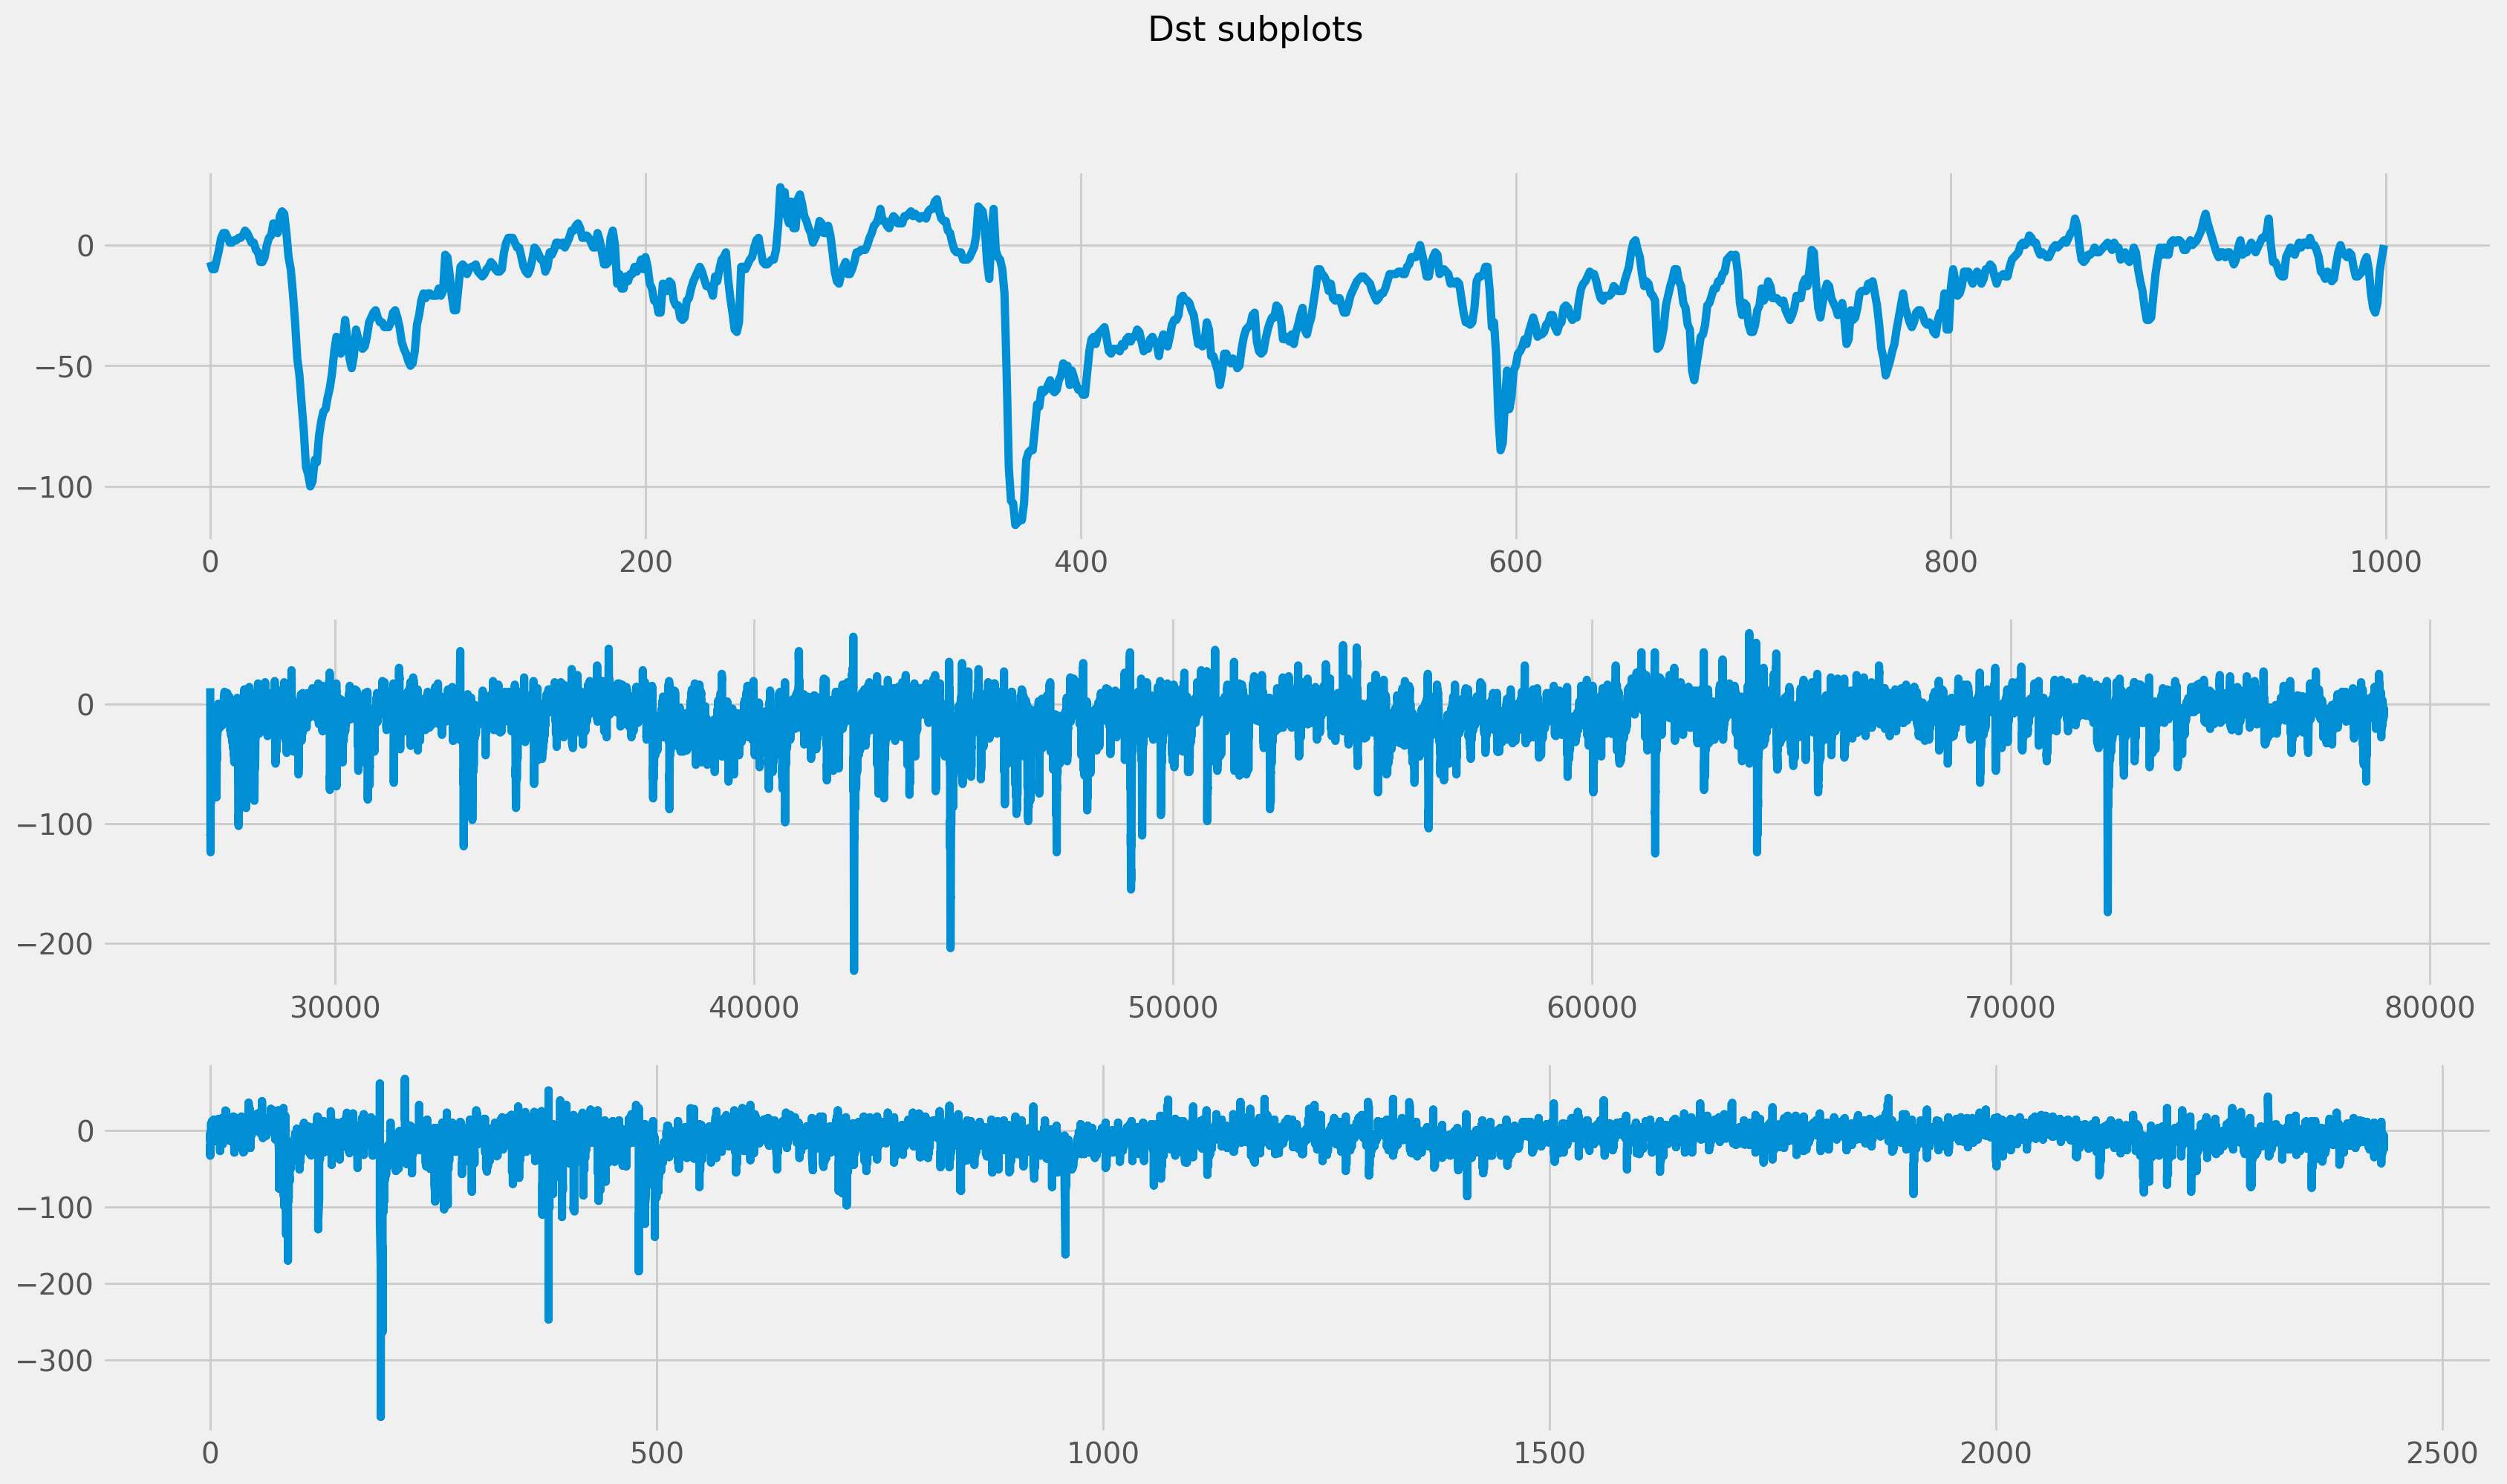

In [38]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

df_a = train_a.iloc[0:1000]
# df2 = df_a.describe()
# print(df2)

fig, axs = plt.subplots(3)
fig.suptitle('Dst subplots')
fig.set_size_inches(18.5, 10.5, forward=True)
axs[0].plot(df_a['dst'])
axs[1].plot(train_b['dst'])
axs[2].plot(train_c['Day'],train_c['dst'])
